# Scientific python: NumPy, SciPy and Matplotlib

## Learning objectives

  * Learn what NumPy arrays are
  * Learn basic array manipulations
  * Learn what vectorial code is
  * Quick overview of SciPy
  * Learn how to do a simple 2D plot and decorate it
  * Learn how to combine plots into a single figure

## Further reading
* http://scipy-lectures.org
* https://www.nature.com/articles/s41586-020-2649-2
* https://numpy.org/doc/

## SciPy ecosystem

From their [website](https://scipy.org):
> SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages:
>  * NumPy
>  * SciPy library
>  * Matplotlib 
>  * IPython
>  * Sympy
>  * Pandas

...and much more.

## NumPy

* NumPy is a key building block used by SciPy.

* NumPy supports:

  * Multidimensional arrays (`ndarray`)
  * Matrices and linear algebra operations
  * Random number generation
  * Fourier transforms
  * Polynomials
  * Tools for integrating with Fortran/C libraries
  
* NumPy provides fast precompiled functions for numerical routines.

* Official website: https://www.numpy.org/

## "Array programming with NumPy"
https://www.nature.com/articles/s41586-020-2649-2

**Abstract**: *Array programming provides a powerful, compact and expressive syntax for accessing, manipulating and operating on data in vectors, matrices and higher-dimensional arrays. NumPy is the primary array programming library for the Python language. It has an essential role in research analysis pipelines in fields as diverse as physics, chemistry, astronomy, geoscience, biology, psychology, materials science, engineering, finance and economics. For example, in astronomy, NumPy was an important part of the software stack used in the discovery of gravitational waves and in the first imaging of a black hole. Here we review how a few fundamental array concepts lead to a simple and powerful programming paradigm for organizing, exploring and analysing scientific data. NumPy is the foundation upon which the scientific Python ecosystem is constructed. It is so pervasive that several projects, targeting audiences with specialized needs, have developed their own NumPy-like interfaces and array objects. Owing to its central position in the ecosystem, NumPy increasingly acts as an interoperability layer between such array computation libraries and, together with its application programming interface (API), provides a flexible framework to support the next decade of scientific and industrial analysis.*

### NumPy Arrays overview

* Core (or Standard) Python Library provides lists and 1D arrays (array.array)

  * Lists are general containers for objects
  * Arrays are 1D containers for objects of the same type
  * Limited functionality
  * Some memory and performance overhead associated with these structures

* NumPy provides multidimensional arrays (numpy.ndarray)
  * Can store many elements of the same data type in multiple dimensions
  * cf. Fortran/C/C++ arrays
  * More functionality than Core Python e.g. many conveninent methods for array manipulation
  * Efficient storage and execution

* [Extensive online documentation !](https://docs.scipy.org/doc/numpy/)

### PyBryt

In the material below you will see that the Python package [PyBryt](https://github.com/microsoft/pybryt) is imported and used to check your solution against some tested reference solution. You may be somewhat familiar with `PyBryt` from the pre-sessional material and will learn a little more about it throughout the year. In any case, you don't need to worry about this package in terms of how it works etc., it's simply included here to provide rapid feedback regarding the correctness of certain exercises. Hence there's no need to fiddle with any `PyBryt` related code in this notebook.

### Creating 1D arrays

In [1]:
# Import pybryt which will be used to check your solutions against reference solutions
import pybryt
from reflecture import pybryt_reference

In [2]:
# Convention: Import numpy and alias/rename it as np
import numpy as np

There are many ways to create 1d array, *e.g.*:

In [3]:
# Create array from Python list.
a = np.array([-1, 0, 1])
print(a)

[-1  0  1]


In [4]:
# Create array using the array class copy constructor.
b = np.array(a)
print(b)

[-1  0  1]


While these might look the same when printed above, all Numpy arrays are of type '`ndarray`':

In [5]:
print(type(b))
li = [1, 2, 3]
print(type(li))

<class 'numpy.ndarray'>
<class 'list'>


Arrays can also be created using `numpy` functions, *e.g.*

In [6]:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# arange for arrays (like using range for lists)
a = np.arange( -2, 6, 2 )
print(a)

[-2  0  2  4]


In [7]:
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
# linspace to create sample step points in an interval
a = np.linspace(-10, 10, 4) 
print(a)

[-10.          -3.33333333   3.33333333  10.        ]


In [8]:
# Contrast this with arange.
print(np.arange(-10, 10, 4))

[-10  -6  -2   2   6]


### <span style="color:blue">Exercise 2.1</span>
Add comments explaining what the following NumPy functions do.

In [9]:
b = np.zeros(3)
print(b)

# create 1-D array that only contains 0s with numpy

[0. 0. 0.]


In [10]:
c = np.ones(3)
print(c)

# create 1-D array that only contains 1s with numpy

[1. 1. 1.]


In [11]:
d = np.eye(3)
print(d)

# create a 2-D array with ones on the diagonal and zeros elsewhere.

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Array attributes

As part of the array structure, NumPy keeps track of metadata for the array as "attributes".

In [12]:
# Taking "a" from the previous example
a = np.linspace(-10, 10, 5) 

In [13]:
# Examine key array attributes
print(a)
print("Dimensions ", a.ndim)   # Number of dimensions
print("Shape      ", a.shape)  # number of elements in each dimension
print("Size       ", a.size)   # total number of elements
print("Data type  ", a.dtype)  # data type of element, 64 bit float (IEEE 754) by default

[-10.  -5.   0.   5.  10.]
Dimensions  1
Shape       (5,)
Size        5
Data type   float64


Basic data type can be specified at creation:

In [14]:
a = np.array( [1.1,2.2,3.3], np.float32)
print(a)
print("Data type", a.dtype)

[1.1 2.2 3.3]
Data type float32


In [15]:
a = np.array([1,2,3,4], np.float64)
print(a)
print("Data type", a.dtype)

[1. 2. 3. 4.]
Data type float64


### Multi-dimensional arrays

There are many different ways to create N-dimensional arrays. A two-dimensional array or matrix can be created from, e.g., list of lists.

In [16]:
mat = np.array( [[1,2,3], [4,5,6]] )
print(mat)
print("Dimensions: ", mat.ndim)
print("Size:       ", mat.size)
print("Shape:      ", mat.shape)

[[1 2 3]
 [4 5 6]]
Dimensions:  2
Size:        6
Shape:       (2, 3)


`pprint` (*'pretty print'*) can be used for fancier display of multi-dimensional arrays:

In [17]:
from pprint import pprint

pprint(mat)

array([[1, 2, 3],
       [4, 5, 6]])


You can create 2d arrays with complex elements by specifying the data type.

In [18]:
alist = [[1, 2, 3], [4, 5, 6]]
mat = np.array(alist, complex)
pprint(mat)
print(mat.dtype)

array([[1.+0.j, 2.+0.j, 3.+0.j],
       [4.+0.j, 5.+0.j, 6.+0.j]])
complex128


### <span style="color:blue">Exercise 2.2</span>

Work out the shape of the resulting arrays before executing the following cells. <br>
(HINT: Length of he innermost list gives the size of the rightmost shape index.) <br>
Leave the variable names unchanged. To submit your answers: <br>
* set the variable "a_rows" to the correct number of row, and
* set the variable "a_columns" to the correct number of columns.

In [19]:
## don't change the following line of code in any way
a = np.array( [[11,12,13], [21,22,23], [31,32,33], [41,42,43]] ) 
pprint(a)

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33],
       [41, 42, 43]])


Now create 2 variales called `a_rows` and `a_columns` and set their values to how many rows and columns array `a` has.

In [20]:
## Solution...
a_rows = a.shape[0]
a_columns = a.shape[1]

In [21]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
testlist = [a_rows,a_columns]
with pybryt.check(pybryt_reference(2, 2)):
    a
    testlist

REFERENCE: exercise-2_2
SATISFIED: True
MESSAGES:
  - SUCCESS: Array `a` checked: OK
  - SUCCESS: Correct number of columns and/or rows


In [22]:
print("a", a.shape)
print(a.ndim)
print(a.size)

a (4, 3)
2
12


In [23]:
b = np.array( [[[1,1],[2,2],[3,3],[4,4]] , [[1,1],[2,2],[3,3],[4,4]], [[1,1],[2,2],[3,3],[4,4]]] )
print("b", b.shape)
print(b.ndim)
print(b.size)

b (3, 4, 2)
3
24


### Accessing arrays

Basic indexing and slicing can be used to access array elements, as we know from lists.

In [24]:
# a[start:stop:stride] (not inclusive of stop)
a = np.arange(8)     # another function for creating arrays
print("a", a)
print("a[2:4]", a[2:4])
print("a[0:7:3]", a[0:7:3])
print("a[:5:2]", a[:5:2])

a [0 1 2 3 4 5 6 7]
a[2:4] [2 3]
a[0:7:3] [0 3 6]
a[:5:2] [0 2 4]


Negative (or modulo) indices are valid:

In [25]:
# To, e.g., access the last element
print(a[-1])

7


### <span style="color:blue">Exercise 2.3</span>

Create an np.array called `b` and manually set the values what you expect the output of `a[2:-3:2]` would be.

In [26]:
## Solution...
# b = np.array(a[2:-3:2])
b = np.arange(2,5,2)

In [27]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 3)):
    a
    b

REFERENCE: exercise-2_3
SATISFIED: True
MESSAGES:
  - SUCCESS:


For multi-dimensional arrays, tuples or index notations can be used.

In [28]:
# Basic indexing of a 3d array
c = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
pprint(c)

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])


In [29]:
print(c.shape)
print("c[1][0][1]:", c[1][0][1]) # using index notation
print("c[1,0,1]:", c[1,0,1])     # using a tuple (more performant)

(2, 2, 2)
c[1][0][1]: 6
c[1,0,1]: 6


In [30]:
c = np.array([[1,2,3],[5,6,8]])
pprint(c)
print(c.shape)
print("c[1][2]:", c[1][2]) # using index notation
print("c[1,2]:", c[1,2])     # using a tuple (more performant)

array([[1, 2, 3],
       [5, 6, 8]])
(2, 3)
c[1][2]: 8
c[1,2]: 8


In [31]:
c = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
pprint(c)

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])


If the number of indices given is less than the number of axes, missing axes are taken as complete slices.

In [32]:
pprint(c[1]) 
pprint(c[1,0])   
pprint(c[1,0,...]) # can use elipsis (3 dots) for missing indices

array([[5, 6],
       [7, 8]])
array([5, 6])
array([5, 6])


Slicing tuple objects can also be created to extract/manipulate indices. A slicing object takes the form `slice(start, stop, step)`. Therefore, to take the slice `a[2:-3:2]` we could also write

In [33]:
pprint(a)
pprint(a[2:-3:2])
my_slice = (slice(2, -3, 2))
print(a[my_slice])

array([0, 1, 2, 3, 4, 5, 6, 7])
array([2, 4])
[2 4]


Note that a negative step can also be used to invert an array. Take for example

In [34]:
d = np.arange(9).reshape(3,3)
print(d)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


This can be inverted along both axes via

In [35]:
print(d[::-1, ::-1])

[[8 7 6]
 [5 4 3]
 [2 1 0]]


or equivalently

In [36]:
print(d[(slice(None, None, -1), slice(None, None, -1))])

[[8 7 6]
 [5 4 3]
 [2 1 0]]


### Array copies

Simple assignment creates references or 'shallow' copies of arrays.

In [37]:
a = np.array( [-2,6,2] )
print("a", a)
b = a
a[0] = 20

# b points to a, hence printing a and b will produce the same result
pprint(a)
pprint(b)

a [-2  6  2]
array([20,  6,  2])
array([20,  6,  2])


Use `copy()` to create a true or 'deep' copy.

In [38]:
c = a.copy()
# check c really is an independent copy of a
c[2] = 42
print(a)
print(c)

[20  6  2]
[20  6 42]


### Views from slices

A "view" is an array that refers to another array’s data (like references). You can create a view on an array by selecting a slice of an array. No data is copied when a view is created. 

In [39]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]]) 
pprint(a)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])


In [40]:
# You can assign a slice to a variable and change the array referred to 
# by the slice
print(a.ndim,a[2][1],a[2][2])
s = a[2:3, 1:3]
print(s)
s[:,:] = -2
print("s", s)
print("a", a)

2 8 9
[[8 9]]
s [[-2 -2]]
a [[ 1  2  3]
 [ 4  5  6]
 [ 7 -2 -2]]


### <span style="color:blue">Exercise 2.4</span>
Create a two-dimensional array called `m` to represent the following matrix,
$$
\mathbf{m} = \left\lbrack\begin{array}{ccc}
1 & 1 & 2\cr
3 & 5 & 8\cr
13 & 21 & 34\cr
55 & 89 & 144
\end{array}\right\rbrack
$$

Then change all the elements with values 21, 34, 89, and 144 in matrix `m` (i.e. bottom right corner elements) to 1001 by using a slice.

In [41]:
## Solution...
m = np.array([[1,1,2],[3,5,8],[13,21,34],[55,89,144]])
tmp_slice = m[2:4,1:3]
tmp_slice[:,:] = 1001

In [42]:
# The following code is used to check your answer and should not be modified
with pybryt.check(pybryt_reference(2, 4)):
    m

REFERENCE: exercise-2_4
SATISFIED: True
MESSAGES:
  - SUCCESS: Great, you have succesfully affected the change to the array.


### Reshaping arrays

The shape of an array can be modified, and/or its size changed:

In [43]:
a = np.arange(6)
print("a = ")
pprint(a)
print("a.shape = ", a.shape, "\n")

# modifying the shape attribute (not a copy) requires
# that the size remains the same
a.shape = (3,2)
pprint(a)

a = 
array([0, 1, 2, 3, 4, 5])
a.shape =  (6,) 

array([[0, 1],
       [2, 3],
       [4, 5]])


In [44]:
# Or you can alter the size and shape of the array with resize().
# https://numpy.org/doc/stable/reference/generated/numpy.resize.html
mat = np.arange(6)
print("mat = ", mat)

mat1 = np.resize(mat, (3, 2))
print("mat1 = ", mat1)

mat2 = np.resize(mat, (3, 9))
print("mat2 = ", mat2)

mat3 = np.reshape(mat, (3, 2))
print("mat3 = ", mat3)

mat =  [0 1 2 3 4 5]
mat1 =  [[0 1]
 [2 3]
 [4 5]]
mat2 =  [[0 1 2 3 4 5 0 1 2]
 [3 4 5 0 1 2 3 4 5]
 [0 1 2 3 4 5 0 1 2]]
mat3 =  [[0 1]
 [2 3]
 [4 5]]


Note that `mat1`, `mat2` and `mat3` are copies of `mat` <br>
`base` can be used to check if arrays share the same data (*i.e.* they are not copies):

In [45]:
mat1.base is mat #?

False

### <span style="color:blue">Exercise 2.5</span>

How is reshape() different from resize()?

In [46]:
# Let's use this simple array to run the check.
e = np.arange(8)
# check if/how reshape and resize are different using the array above:
e_1 = np.resize(e,(2,4))
e_2 = e.reshape([2,4])
pprint(e_1)
pprint(e_2)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])
array([[0, 1, 2, 3],
       [4, 5, 6, 7]])


### Vectorization and operations on arrays

Vectorization is why numpy arrays are great. It allows element-wise operations (and importantly avoids the need of writing loops!). What output do the following cells give?

In [47]:
a = np.arange(10).reshape([2,5])
b = np.arange(10).reshape([2,5])
print(a)
print(b)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


In [48]:
# Try these
-0.1*a
print(-0.1*a)

print(a+b)

[[-0.  -0.1 -0.2 -0.3 -0.4]
 [-0.5 -0.6 -0.7 -0.8 -0.9]]
[[ 0  2  4  6  8]
 [10 12 14 16 18]]


In [49]:
# This is NOT matrix multiplication!
print(b)
a*b

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

In [50]:
# Use dot product for vector/matrix multiplication
# Note: .T gives you transpose of matrix i.e. reshapes it
a.dot(b.T)

array([[ 30,  80],
       [ 80, 255]])

Be careful: the type of data elements matters here!

Vectorization also works with functions!

In [51]:
def f(x):
    return x**3

x = np.array([1,2,3,4,5,6,7,8,9])
y = f(x)

print(y)

[  1   8  27  64 125 216 343 512 729]


### <span style="color:blue">Exercise 2.6</span>

Let $A$ be the two-dimensional array
$$
\mathbf{A} = \left\lbrack\begin{array}{ccc}
2 & 1 & 0\cr
-1 & 2 & 1\cr
0 & -1 & 2
\end{array}\right\rbrack
$$

In the following line, initilise the two dimensional array `A` propperly to match matrix A.

In [52]:
## Solution...
A = np.array([2,1,0,-1,2,1,0,-1,2]).reshape([3,3])
# pprint(A)

Implement and apply the function
$$
f(x) = x^3 + xe^x + 1
$$
to $A$. <br>
To check that you get what you expect put this in a function called `f_02_06`

In [53]:
# Solution...
# from math import e

def f_02_06(x):
#     return x**3 + x*(e**x) + 1
    return x**3 + x*(np.exp(x)) + 1

# why np.exp() is not working on the test case?

pprint(f_02_06(A))

array([[23.7781122 ,  4.71828183,  1.        ],
       [-0.36787944, 23.7781122 ,  4.71828183],
       [ 1.        , -0.36787944, 23.7781122 ]])


In [54]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 6)):
    f_02_06(A)

REFERENCE: exercise-2_6
SATISFIED: True
MESSAGES:
  - Matrix `A` checked and it looks good.
  - SUCCESS: Amazing! Your function returns the correct solution.


### Manipulating arrays

There are many methods for manipulating arrays (reshaping, joining, splitting, inserting, ...). Check the documentation at https://numpy.org/doc/stable/reference/ or https://docs.python.org/3/reference/index.html

E.g.,
```python
concatenate((a1,a2),axis=0)
split(a, indices_or_sections, axis=0)
flatten
ravel(a)
stack(arrays[, axis])
tile(a, reps)
repeat(a, repeats[, axis])
unique(ar[, return_index, return_inverse, ...])
trim_zeros(filt[, trim])
fill(scalar)
xv, yv = meshgrid(x,y)
```

### <span style="color:blue">Exercise 2.7</span>

See what arrays you can create from some of the functions listed above. An example is provided for concatenate but experiment with some of the other fuctions listed.

In [55]:
## e.g., let's see what concatenate does:
a1 = np.array([[1,2,3],[4,5,6]])
a2 = np.array([[7,8,9],[10,11,12]])
a3 = np.concatenate((a1,a2),axis=1)
print(a3)

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


Use `concatenate` to combine arrays `a1` and `a2` into an array called `a4` with the following arrangement:
$$
\left\lbrack\begin{array}{ccc}
1 & 2 & 3\cr
4 & 5 & 6\cr
7 & 8 & 9\cr
10 & 11 & 12
\end{array}\right\rbrack
$$

In [56]:
## Solution...
a4 = np.concatenate((a1,a2),axis=0)
print(a4)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [57]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 7)):
    a1
    a2
    a4

REFERENCE: exercise-2_7
SATISFIED: True
MESSAGES:
  - SUCCESS: Array `a1` check: OK.
  - SUCCESS: Array `a2` check: OK.
  - SUCCESS: Super! Array `a4` appears as expected.


### Fancy indexing

Advanced or fancy indexing lets you do more than simple indexing. <br>
Let's see how you can index multiple elements of an array and return that as another array.

In [58]:
p = np.array([[0, 1, 2],[3, 4, 5],[6, 7,8],[9, 10, 11]]) 
pprint(p)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])


In [59]:
rows = [0,0,3,3]   # indices for rows
cols = [0,2,0,2]   # indices for columns
q=p[rows,cols]
print(q)

[ 0  2  9 11]


Fancy indexing returns a copy (not a view like slicing)

In [60]:
# ... check if a is a view or a copy
#if we change the value of an element in the copy it does not effect the value in the original - unlike views.
q[0]=1000
print(q)
print(p)

[1000    2    9   11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


### <span style="color:blue">Exercise 2.8</span>

Use `base` to check if array `q` is a copy of array `p`. Use `base` to check. <br>
Now, do the same for a simple indexed slice of `p` (e.g. `p[1:2,3:4]`).

In [61]:
# Solution...
q.base is p # False
p_1 = p[1:2,3:4]
p_1.base is p # True

True

Logical expressions and boolean 'masks' can be used to find indices of elements of interest e.g.

In [62]:
# Find the elements in an arraey with a value less than zero
m = np.array( [[0,-1,4,20,99],[-3,-5,6,7,-10]] )
print(m)
print(m[ m < 0 ])

[[  0  -1   4  20  99]
 [ -3  -5   6   7 -10]]
[ -1  -3  -5 -10]


### <span style="color:blue">Exercise 2.9</span>

Challenge yourself to anticipate the output of the following code before running it.

In [63]:
a = np.arange(10)
print(a)
mask = np.ones(len(a), dtype=bool)
mask[[0,2,4]] = False  # set certain mask values to False
result = a[mask]

# I think mask = [0,1,0,1,0,1,1,1,1,1], then perhaps result = [0,1,0,3,0,5,6,7,8,9]

[0 1 2 3 4 5 6 7 8 9]


 Check if you are correct by by printing the array `result`. i.e. `pprint`

In [64]:
## check using pprint
pprint(result)

# note: the index with False boolean value will be automatically dropped off

array([1, 3, 5, 6, 7, 8, 9])


Now write a function called `f_02_09` using `mask` to return an array function with the following elements from array `a` removed: 3, 5, and 9. <br>
As an input argument the function should take in the array `a`.
As an output the function should return an array with the values 3, 5, and 9 removed from array `a`.

In [65]:
## Solution...
def f_02_09(a):
    mask = np.ones(len(a), dtype=bool)
    mask[[3,5,9]] = False
    return a[mask]

# a new mask or the mask in previous section?

In [66]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 9)):
    print(f_02_09(a))

[0 1 2 4 6 7 8]
REFERENCE: exercise-2_9
SATISFIED: True
MESSAGES:
  - SUCCESS: You are using the correct input parameter to test your function.
  - SUCCESS: Great! Your function returns the correct result.


### Random number generation

Numpy provides utilities for random number generation.

In [67]:
# Create an array of 10 random real numbers
a = np.random.ranf(10)
print(a)

[0.98764425 0.32875014 0.2928415  0.95370641 0.35475842 0.52578785
 0.04779532 0.12799053 0.44816583 0.08275289]


In [68]:
# Create a 2d array (5x5) reshaped matrix from a 1d array of (25) 
# random ints between 0 and 5 (not inclusive)
a = np.random.randint(0,high=5,size=25).reshape(5,5)   
pprint(a)

array([[1, 2, 3, 2, 3],
       [4, 3, 0, 3, 3],
       [2, 3, 3, 1, 0],
       [0, 3, 0, 2, 4],
       [4, 1, 4, 1, 1]])


In [69]:
# Generate sample from normal distribution
# (mean=0, standard deviation=1)
s = np.random.standard_normal((5,5))
pprint(s)

array([[ 0.89656657,  0.31075509,  1.01090475,  0.64795534,  0.02766412],
       [ 0.05605541,  0.59102485,  1.47812172, -1.47160797, -0.95044165],
       [-1.83939444, -1.15254632,  1.80777721,  0.36522113,  0.10370262],
       [ 0.33061146,  1.95962067, -0.94812136, -2.26856756,  0.49532709],
       [-0.71661024, -0.95872205,  0.36315409,  1.36993773, -1.10359173]])


### <span style="color:blue">Exercise 2.10</span>

Explore other ways of generating random numbers. <br>
Below you will find an example for generating samples from a binomial distribution. <br>
What other distributions can you sample? <br>
Further documentation: https://numpy.org/doc/stable/reference/random/generator.html

array([3, 0, 3, 2, 1, 3, 2, 3, 2, 1, 2, 1, 3, 4, 2, 3, 3, 4, 3, 3, 4, 3,
       2, 3, 2])


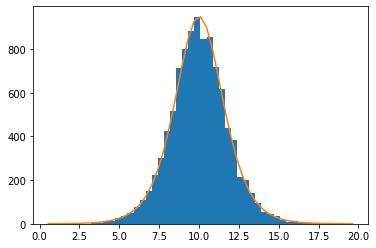

In [70]:
s = np.random.binomial(5, 0.5, size=25)
pprint(s)

# Generate a Logistic Distribution as example
loc, scale = 10, 1
s = np.random.default_rng().logistic(loc, scale, 10000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, bins=50)

def logist(x, loc, scale):
    return np.exp((loc-x)/scale)/(scale*(1+np.exp((loc-x)/scale))**2)
lgst_val = logist(bins, loc, scale)
plt.plot(bins, lgst_val * count.max() / lgst_val.max())
plt.show()

### File operations

Numpy provides an easy way to save data to text file and to read *structured* data.

In [71]:
# Generate an array of 5 random real numbers
pts = 5
x = np.arange(pts)
y = np.random.random(pts)
print(x)
print(y)

[0 1 2 3 4]
[0.34186291 0.18192749 0.27855669 0.63441353 0.42974415]


In [72]:
# data format specifiers: d = int, f = float, e = exponential
np.savetxt('savedata.txt', np.stack((x,y),axis=1), header='DATA', \
           footer='END', fmt='%d %1.4f')
#!cat savedata.txt

In [73]:
# Reload data to an array
p = np.loadtxt('savedata.txt')
print(p)

[[0.     0.3419]
 [1.     0.1819]
 [2.     0.2786]
 [3.     0.6344]
 [4.     0.4297]]


More flexibility is offered with `genfromtext()`  (query `?np.genfromtext`)

In [74]:
p = np.genfromtxt('savedata.txt', skip_header=2, skip_footer=1)
print(p)

[[1.     0.1819]
 [2.     0.2786]
 [3.     0.6344]]


However, be aware that using plain text files for data is considered bad practice due to the lack of any form of standardization. For example, next week you will be introduced to [Pandas](https://pandas.pydata.org/) which is designed to handle structured data.

### <span style="color:blue">Exercise 2.11</span>

What do `numpy.save()` and `numpy.load()` do ?

In [75]:
# try using numpy.save() and numpy.load() here:
np.save('test.npy',p) #save the file
content = np.load('test.npy') # load the file
print(content)

# note: .npy extension should be specified

[[1.     0.1819]
 [2.     0.2786]
 [3.     0.6344]]


### Linear algebra with numpy.linalg
 
Numpy provides some linear algebra capabilities, from matrix-vector product to matrix inversion and system solution

Simple matrix vector product within numpy core:

In [76]:
A = np.array([[1,2,3],[4,5,6],[7,8,8]])
B = np.array([1,2,1])

print(np.dot(A,B))

[ 8 20 31]


The `numpy.linalg` module is necessary for more complex operations.

In [77]:
import numpy.linalg as la

Usual quantities can be computed from arrays:

In [78]:
n = la.norm(B)
print(n)

n = la.norm(A)
print(n)

d = la.det(A)
print(d)

2.449489742783178
16.3707055437449
2.9999999999999996


And it is possible to solve linear systems, using low level C/Fortran code:

In [79]:
la.solve(A,B)

array([ 1.66666667, -3.33333333,  2.        ])

or to invert matrices (which is generally not a good thing to do due to computational cost!)

In [80]:
A_inv = la.inv(A)
print(A_inv)

[[-2.66666667  2.66666667 -1.        ]
 [ 3.33333333 -4.33333333  2.        ]
 [-1.          2.         -1.        ]]


The eigen decomposition (of a square matrix) can also be computed:

In [81]:
eival, eivec = la.eig(A)
print(eival)
pprint(eivec)

[15.55528261 -1.41940876 -0.13587385]
array([[-0.24043423, -0.67468642,  0.51853459],
       [-0.54694322, -0.23391616, -0.78895962],
       [-0.80190056,  0.70005819,  0.32964312]])


### Performance

Python has a convenient timing function called `timeit`.

Can use this to measure the execution time of small code snippets.

* From python: `import timeit` and supply code  snippet as a string
* From ipython: can use magic command `%timeit`

By default, `%timeit` loops (repeats) over your code 3 times and outputs the best time. It also tells you how many iterations it ran the code per loop. 
You can specify the number of loops and the number of iterations per loop.
```
%timeit -n <iterations> -r <repeats>  <code_snippet>
```

See

* `%timeit?` for more information
* https://docs.python.org/2/library/timeit.html


### <span style="color:blue">Exercise 2.12</span>

Here are some `timeit` experiments for you to try. Check which methods are faster?

In [82]:
# Accessing a 2d array
nd = np.arange(100).reshape((10,10))

# accessing element of 2d array
%timeit -n 10000000 -r 3 nd[5][5]
%timeit -n 10000000 -r 3 nd[5,5]

251 ns ± 6 ns per loop (mean ± std. dev. of 3 runs, 10000000 loops each)
132 ns ± 4.98 ns per loop (mean ± std. dev. of 3 runs, 10000000 loops each)


In [83]:
# Multiplying two vectors
x = np.arange(10E7)
%timeit -n 1 -r 10 x*x
%timeit -n 1 -r 10 x**2

407 ms ± 126 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
379 ms ± 77.5 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [84]:
# Comparing range functions and iterating in loops
# Note: some distributions may see overflow in range() example

size = int(1E6)

%timeit for x in range(size): x**2

%timeit for x in np.arange(size): x**2

%timeit np.arange(size)**2

279 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
238 ms ± 49.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.91 ms ± 537 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
# Extra : from the linear algebra package
%timeit -n 1 -r 10 np.dot(x,x)

55.8 ms ± 14.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


### <span style="color:blue">Exercise 2.13</span>

The Taylor series expansion for the trigonometric function $\arctan(y)$ is :
$$\arctan ( y) \, = \,y - \frac{y^3}{3} + \frac{y^5}{5}  - \frac{y^7}{7}  + \dots $$
Now, $\arctan(1) = \pi/4 $, so
$$ \pi = 4 \, \Big( 1- \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + ... \Big) $$
<br>
We can represent the first few terms of the series expansion of $\arctan(y)$ using a numpy `Polynomial`, with coefficients:
$$0, +1, 0, -1/3, 0, +1/5, 0, -1/7,\ldots\,$$ 
and then use it to approximate $\pi$.

Write a function called `arctan` using the expansion above and use it to calculate an approximation of $\pi$ using numpy polynomials.

In [86]:
## You should use numpy.polynmial in your function so lets import it
from numpy.polynomial import Polynomial

In [87]:
## Solution...
def arctan(y):
    poly_coeff_arctan_ext = (((-1)**np.arange(10000000)) / (2*np.arange(10000000)+1)).flatten()
#     print(poly_coeff_arctan_ext)
    p_new = Polynomial(poly_coeff_arctan_ext)
    return p_new(y)

In [88]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 13)):
    print(4.0*arctan(1))

3.1415925535897933
REFERENCE: exercise-2_13
SATISFIED: False
MESSAGES:
  - ERROR: Your function doesn`t calculate arctan(1) to a sufficent accuracy 


Bonus excercise: <br>
Find the size of the expansion that results in an approximation of order $10^{-4}$. (You can check the difference by using `numpy.pi`) <br>
Suggestion: Perhaps start by generating a 1D array with the coefficients of the arctan expansion. Let the function that returns that 1D array be called `poly_coeff_arctan_ext`. <br>
The input argument to the function `poly_coeff_arctan_ext` should be number of terms in the expansion (including the zeros). <br>
E.g. The previous expansion up to "-1/7" contained 8 terms.
Let your final answer be called `mypi`. It will be checked against a referenced solution to provide you with some feedback.

In [89]:
# Bonus solution...
def poly_coeff_arctan_ext(n):
    return (((-1)**np.arange(n)) / (2*np.arange(n)+1)).flatten()

def mypi():
    p_new = Polynomial(poly_coeff_arctan_ext(10000))
    return p_new(1)

In [90]:
## The following code is used to check your solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 131)):
    poly_coeff_arctan_ext(10000)
    mypi
    #for j in range(4): x = j

REFERENCE: exercise-2_131
SATISFIED: False
MESSAGES:
 
 
 
 
 
 
 
 
 
  - ERROR: Your `poly_coeff_arctan_ext` function returns the correct array of the coefficients
  - Well done! No large iterator loops were detected.


### <span style="color:blue">Exercise 2.14</span> : Darts (calculating $\pi$ again)


#### A Monte Carlo method (aka "throwing darts")

Geometry gives us an expression for $\pi$:

if $N_{in}$ is the number of darts falling on the board, and $N_{tot}$ is the total number of trials

![](darts.png)

$$
\pi \approx 4 N_{in} / N_{tot}
$$

Try using numpy arrays to compute the following:
1. Choose a sample size `ntot`
2. Generate an array of random $x$ coordinates $0 \leq x < 1$.
3. Generate an array of random $y$ coordinates $0 \leq y < 1$.
4. Count the number for which $x^2 + y^2 < 1$
5. Compute appromination to $\pi$
6. Repeat for several values of `ntot` and print the error.

The name of the function you should use should be `f_02_14(ntot)` where `ntot` is the number of trials/throws

In [91]:
## Solution...
## don't forget to set ntot
ntot = 1000000

# Method 1: shortest
# def f_02_14(ntot):
#     x_s = np.random.random_sample((ntot,)) # [0,1)
#     y_s = np.random.random_sample((ntot,)) # [0,1)
#     r_s = x_s**2+y_s**2
#     return (4* len(r_s[r_s<1])) / ntot

# Method 2: random.rand()
def f_02_14(ntot):
    np.random.seed(42)
    p_s = np.random.rand(ntot,2)
    nin = np.sqrt(p_s[:,0]**2+p_s[:,1]**2) < 1
    plt.plot(p_s[nin,0],p_s[nin,1],'b.')
    plt.plot(p_s[nin==False,0],p_s[nin==False,1],'r.')
    plt.show()
    return 4*len(nin[nin == True]) / ntot

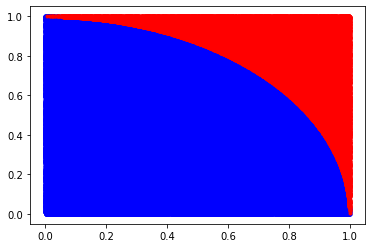

3.141688
REFERENCE: exercise-2_14
SATISFIED: False
MESSAGES:
  - Nice. No loops could be found in your function.
  - Your approx. of pi is accurate to 2 digits.
  - Your approx. of pi is accurate to 3 digits.
  - Your approx. of pi is accurate to 4 digits.
 
 
 
 
 
 
  - Well done! No large iterator loops were detected.


In [92]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 14)):
    print(f_02_14(ntot))    

## SciPy library:

It provides a wide range of user-friendly routines (often built on NumPy) needed in scientific work. It is organised in several sub-modules:
  * scipy.constants
  * scipy.special
  * scipy.io
  * scipy.linalg
  * scipy.sparse
  * scipy.integrate
  * scipy.interpolate
  * scipy.stats
  * scipy.cluster
  * scipy.odr
  * scipy.optimize
  * scipy.signal
  * scipy.fftpack
  * scipy.ndimage
  * scipy.spatial

### Linear algebra

[scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html) contains additional routines compared to `numpy.linalg`

In [459]:
import scipy.linalg as sla

Construct an orthonormal basis for the range of A using its SVD:

In [460]:
A = np.array([[2,1,1],[1,2,1],[1,1,2]])
b = np.array([1,2,3])

orth_basis = sla.orth(A)
pprint(orth_basis)

array([[-5.77350269e-01, -5.04179082e-17,  8.16496581e-01],
       [-5.77350269e-01, -7.07106781e-01, -4.08248290e-01],
       [-5.77350269e-01,  7.07106781e-01, -4.08248290e-01]])


Compute the Schur decomposition of a matrix:

In [461]:
A = np.array([[0, 2, 2], [0, 1, 2], [1, 0, 1]])
T, Z = sla.schur(A)
pprint(T)
pprint(Z)
print("A == Z.T.Z^t: ", np.allclose(A, Z.dot(T).dot(Z.transpose())))

array([[ 2.65896708,  1.42440458, -1.92933439],
       [ 0.        , -0.32948354, -0.49063704],
       [ 0.        ,  1.31178921, -0.32948354]])
array([[ 0.72711591, -0.60156188,  0.33079564],
       [ 0.52839428,  0.79801892,  0.28976765],
       [ 0.43829436,  0.03590414, -0.89811411]])
A == Z.T.Z^t:  True


### Integration

`scipy.integrate` contains routines to intgrate expressions as well as discrete data:

In [462]:
import scipy.integrate as sint

In [463]:
x2 = lambda x: x**2
sint.quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

In [464]:
x = np.arange(0, 10)
y = np.arange(0, 10)
y = np.power(x, 1)
sint.simps(y, x)

40.5

### Interpolation

`scipy.interpolate` provides functions to interpolate data (regression, curve fitting, etc)

In [518]:
import scipy.interpolate as sitp

Find the Lagrange polynomial (polynomial that passes through all data points) :

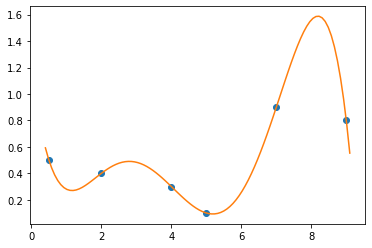

In [519]:
# %matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Invent some raw data 
x=np.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=np.array([0.5,0.4,0.3,0.1,0.9,0.8])

## scipy.interpolate returns a numpy.poly1d instance
lp=sitp.lagrange(x, y)

xx= np.linspace(0.4, 9.1, 100)
fig = plt.figure()
plt.plot(x,y, "o", xx, lp(xx))
plt.show()

Fit a polynomial of arbitrary degree to a data set. Notice that the object returned is not a function this time and needs to be transformed into a function.

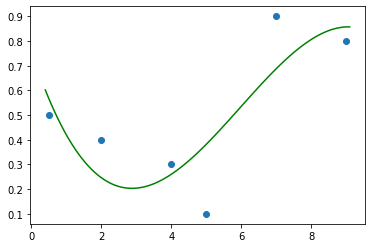

In [520]:
poly_coeffs=np.polyfit(x, y, 3)
p3 = np.poly1d(poly_coeffs)
fig = plt.figure()
plt.plot(x, y, "o", xx, p3(xx), 'g', label='Cubic')
plt.show()

### Optimisation

`scipy.optimise` provides a very wide range of optimisation methods: Newton-like minimization algorithms, least square methods, root finding... 

NB. Examples below are inspired from the official documentation. Interesting examples require setting up complex problems ands exceed the scope of this presentation.

In [521]:
import scipy.optimize as sopt

Let's find the minimum of a simple 1D function: <br>

$$ f(x) = -e^{-(x-0.2)^2} $$

In [522]:
## let's define a simpe function

def f(x):
    return -np.exp(-(x - 0.2)**4)

result = sopt.minimize_scalar(f)

x_min = result.x
print(x_min)

0.1999935939940212


And now a more complex 2D one:

$$ f(x,y)=\frac{1}{2}(1-x)^{2}+(y-x^{2})^{2} $$


In [523]:
def f(x):   # rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2


def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

sopt.minimize(f, [2,-1], method="Newton-CG", jac=jacobian) 

     fun: 1.5601357400786612e-15
     jac: array([ 1.05753092e-07, -7.48325277e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 0
     nit: 10
    njev: 33
  status: 0
 success: True
       x: array([0.99999995, 0.99999988])

### Special functions

`scipy.specials` provides a certain number of useful mathematical functions: Airy functions, Bessel functions, elliptic integrals, gamma function, erf, binomial law, etc. <br>

Reference documentation: https://docs.scipy.org/doc/scipy/reference/special.html

## Plotting with Matplotlib

From the official [documentation](https://matplotlib.org/):
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. [...]

> Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery.

> For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.

In this notebook, we are mostly focused on the [`matplotlib.pyplot`](http://matplotlib.org/api/pyplot_summary.html) submodule 

### Importing Matplotlib

The most standard:
```
import matplotlib.pyplot as plt
```
Be careful to anonymous imports (`from matplotlib.pyplot import *` that will pollute your namespace.

iPython magic can be used to display plots in the browser:
```
%matplotlib inline
```
or for fancier dynamic plots
```
%matplotlib notebook
```
You can see what magic commands do by typing `?%matplotlib inline`. Note that, in that case, you need to import `pyplot` after the magic command.

### Basic plots (re: lecture 3)

Let's prepare some data:

In [524]:
import numpy as np
# %matplotlib notebook
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
z = np.sin(x+np.pi/2)

Plotting this data is as simple as:

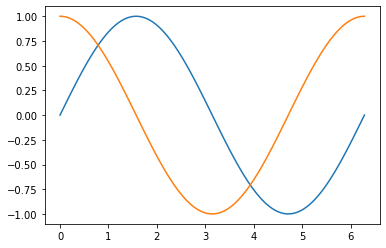

In [525]:
fig = plt.figure()

plt.plot(x, y)
plt.plot(x, z)
plt.show()

or

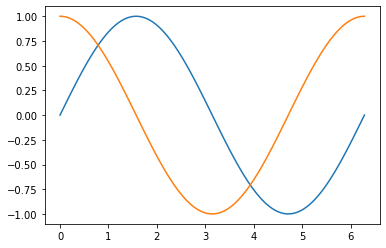

In [526]:
fig = plt.figure()

plt.plot(x,y, x, z)
plt.show()

We can specify axes limits and titles, and a global plot title:

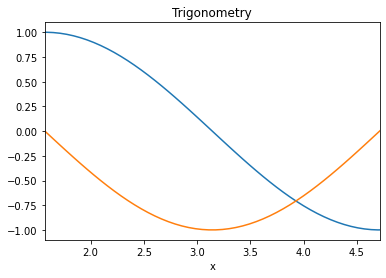

In [527]:
fig = plt.figure()

plt.xlim((x.max()*0.25, x.max()*0.75))
plt.xlabel("x")
plt.title("Trigonometry")
plt.plot(x,y, x, z)
plt.show()

as well as legends:

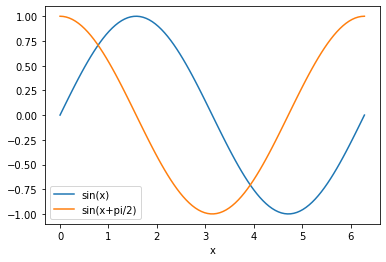

In [528]:
fig = plt.figure()

plt.xlabel("x")
plt.plot(x,y, x, z)
plt.legend(("sin(x)", "sin(x+pi/2)"))
plt.show()

### Line style

Each curve of the plot can be decorated individually:

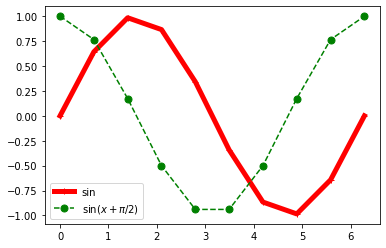

In [529]:
x1 = np.linspace(0, 2*np.pi, 10)
y1 = np.sin(x1)
z1 = np.sin(x1+np.pi/2)

fig = plt.figure()

plt.plot(x1, y1, '+-r', label="sin", linewidth=5.0)
plt.plot(x1, z1, 'o--g', label="$\sin(x+\pi/2)$", markersize=7.0)
plt.legend()
plt.show()

Plots can even be annotated !

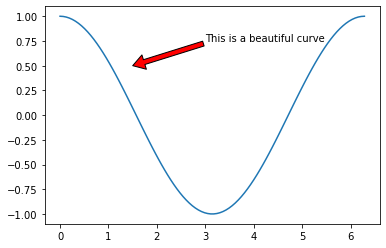

In [530]:
fig = plt.figure()

plt.plot(x, z)
atext = 'This is a beautiful curve'
arrowtiploc = (1.5, 0.5)
textloc=(3, 0.75)
plt.annotate(atext, xy=arrowtiploc, xytext=textloc,
            arrowprops=dict(width=5,headwidth=15,
            facecolor='red'))
plt.show()

### Histograms

Other kinds of plots can be made, like histograms. A more complete list of plots can be found [here](https://matplotlib.org/gallery.html)

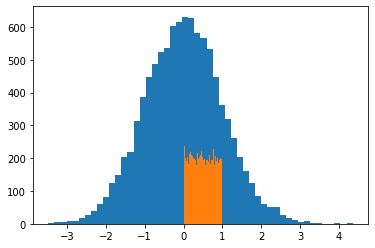

In [531]:
fig = plt.figure()

#10,000 Uniform random numbers
x2 = np.random.random(10000)
#10,000 Normally distributed random numbers
y2 = np.random.randn(10000)
#Plot both on a histogram with 50 bins
plt.hist(y2, 50)
plt.hist(x2, 50)
plt.show() #Or plt.save g("out.png")

### Saving images

Sometimes, you might want to save images for a report or a presentation. Instead of taking a screenshot of the plot, you can save it to a file. The file format is determined by the filename extension you supply. The following common  formats are supported: `.png`, `.jpg`, `.pdf` and `.ps`. There are other options to control the size and resolution of the output.

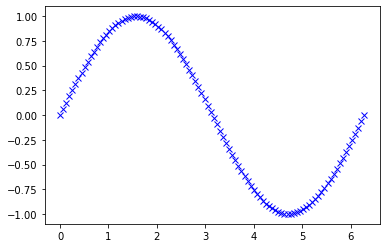

In [532]:
fig = plt.figure()

plt.plot(x, y, 'bx')
plt.savefig("sin.png", dpi=200)
plt.show()

### Subplots

Sometimes, you will want to group several plots in one figure. Matplotlib provides an flexible way of managing subplots.
```
    (fig, axes) = plt.subplots(nrows, ncols)
```
`subplots()` returns a tuple with a reference to the figure (`fig`) and an array of references to each subplot axes (`axes`)
    



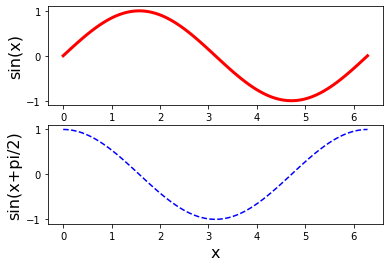

In [533]:
fig, axes = plt.subplots(2,1)
axes[0].plot(x, y, lw=3., c='r')
axes[1].plot(x, z, '--b')
axes[1].set_xlabel("x", fontsize=16)
axes[0].set_ylabel("sin(x)", fontsize=16)
axes[1].set_ylabel("sin(x+pi/2)", fontsize=16)
plt.show()

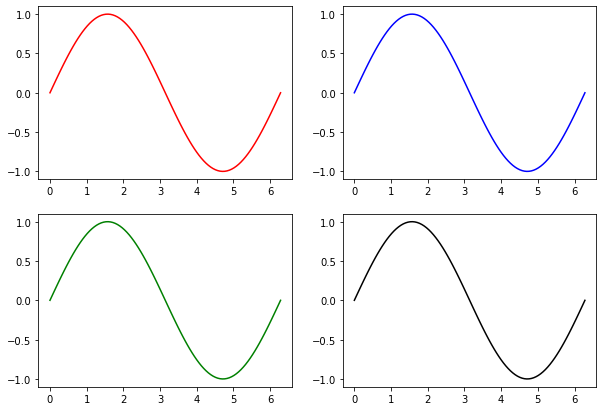

In [534]:
(fig, axes) = plt.subplots(2, 2, figsize=(10,7))
axes[0,0].plot(x, y, 'r')
axes[0,1].plot(x, y, 'b')
axes[1,0].plot(x, y, 'g')
axes[1,1].plot(x, y, 'k')
plt.show()


Alternatively, you can select a subplot and make it the "current subplot"

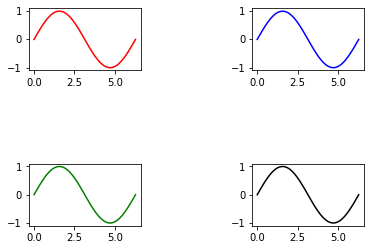

In [535]:
(fig, axes) = plt.subplots(2, 2)
plt.subplots_adjust(wspace = 1., hspace=1.5)

plt.sca(axes[0,0])
plt.plot(x, y, 'r')
plt.sca(axes[0,1])
plt.plot(x, y, 'b')
plt.sca(axes[1,0])
plt.plot(x, y, 'g')
plt.sca(axes[1,1])
plt.plot(x, y, 'k')
plt.show()

For more complex subplot layouts `plt.subplot2grid` can be used. It maps the figure to a grid, and you can define subplots spanning across several cells of the grid. It takes 4 arguments:
```
subplot2grid(shape,
             location,
             rowspan = 1,
             colspan = 1)
```
`shape` is the shape of the grid (number of cells), it needs to be the same for each call of the function within one figure. `location` is the location of the top-left corner of the subplot. `rowspan` and `colspan` define respectively the length and heigth of the plot.

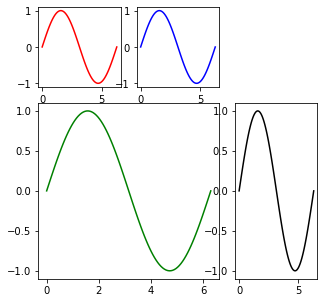

In [536]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
# what happens if you uncomment the following line? 
#ax5 = plt.subplot2grid((3, 3), (1, 1), colspan=1, rowspan=1)
ax1.plot(x, y, 'r')
ax2.plot(x, y, 'b')
ax3.plot(x, y, 'g') 
ax4.plot(x, y, 'k')
plt.show()

### 2D

There are several ways to represent multidimensional data. One can choose to represent the data contained in a 2D domain (a matrix) with colors (in a 2D plot), or with surfaces (in a 3D plot).

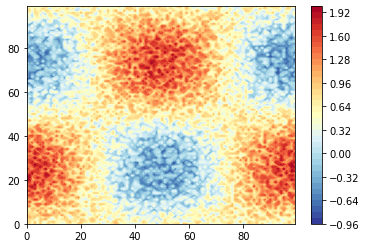

In [537]:
fig = plt.figure()

N = 100
x = np.linspace(0,2*np.pi,N)
y = np.sin(x); z = np.cos(x)
#Create 2D field from outer product of previous 1D functions
noise = np.random.random(N**2)
u = np.outer(y,z) + noise.reshape(N,N)
plt.contourf(u, 40, cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.show()

### <span style="color:blue">Exercise 2.15</span>

Consider the following functions defined on a 2D domain $\Omega = [0,1]$:
$$ a(x) = \tanh(50\sin(\frac{25}{2}\pi x))$$
and
$$ f(x) = a(a(|x-x_0|)) + a(a(|x-x_1|)) $$
for any $x \in \Omega$, with $x_0=(0,0)$ and $x_1=(1,1)$

Plot $f$ on $\Omega$. You may want to use `numpy.meshgrid`.

You need call the function `f(x)`, func_f(x,y) with input arguments an array for the sample x-coordinates and an arrany for the sample y-coordinates <br>
and the function `a(x)`, func_a(x) <br>

In [97]:
fig = plt.figure()
## Solution...
def func_f(x,y):
    X,Y = np.meshgrid(x,y)
    dist_0 = np.sqrt(X**2 + Y**2)
    dist_1 = np.sqrt((X-1)**2 + (Y-1)**2)
    f = a(a(dist_0)) + a(a(dist_1))
    plt.contourf(X,Y,f)    
    plt.show()

def a(x):
    return np.tanh(50*np.sin(12.5*np.pi*x))

def func_a(x):
    plt.plot(x,a(x))
    plt.show()

<Figure size 432x288 with 0 Axes>

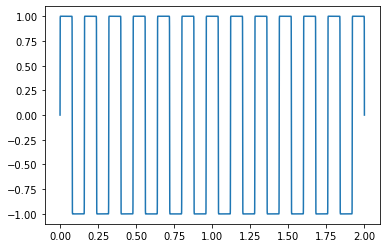

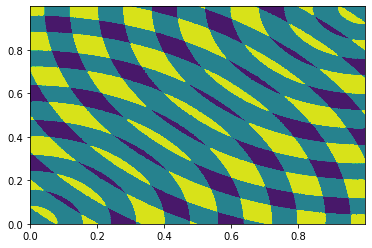

REFERENCE: exercise-2_15
SATISFIED: False
MESSAGES:
  - SUCCESS: Great, your function a(x) seems to be working fine.
  - SUCCESS: Great, your function f(x) seems to be working fine.
  - SUCCESS: Well done! You have used vectorisation instead of using a loop.


In [98]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
with pybryt.check(pybryt_reference(2, 15)):
    test_pts = np.linspace(0, 2,10000)
    func_a(test_pts)
    func_f(x,y)

### 3D

A wide variety of options are available for 3D plots, that are usually contained in specific submodules.

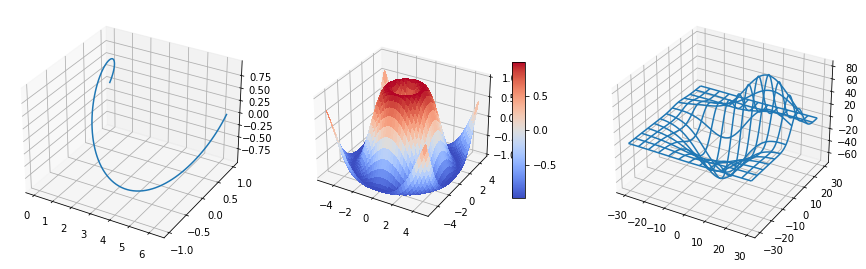

In [103]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import get_test_data


fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

ax = fig.add_subplot(1,3,1, projection='3d')

# plot a curve
x = np.linspace(0.,2*np.pi,100)
ax.plot(x, np.cos(x), np.sin(x))

ax = fig.add_subplot(1, 3, 2, projection='3d')

# plot a 3D surface
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 3, 3, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

### Animations

Animations (*i.e.* series of images) can be created with matplotlib. However, exercise some restraint as they can require significant resources.

D:\Anaconda3\envs\ese-msc\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


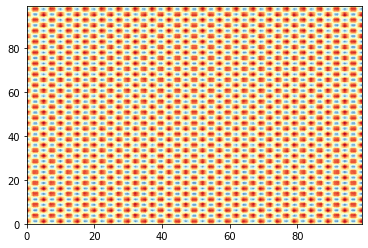

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

fig = plt.figure()

def get_field(a, N = 100):
    x = a*np.linspace(0,2*np.pi,N)
    y = np.sin(x); z = np.cos(x)
    out =  np.outer(y,z)
    plt.contourf(out, 40, cmap=plt.cm.RdYlBu_r)

    
field = get_field(20)
        
ani= matplotlib.animation.FuncAnimation(plt.gcf(), field, frames=range(0,10),
                                       interval=500, repeat=False)
plt.show()

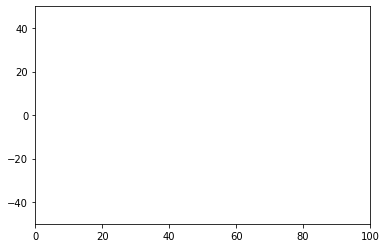

In [105]:
import random

ysample = random.sample(range(-50, 50), 100)

xdata = []
ydata = []

fig = plt.figure()

axes = plt.gca()
axes.set_xlim(0, 100)
axes.set_ylim(-50, +50)
line, = axes.plot(xdata, ydata, 'r-')

def update(i):
    xdata.append(i)
    ydata.append(ysample[i])
    line.set_xdata(xdata)
    line.set_ydata(ydata)

ani= matplotlib.animation.FuncAnimation(plt.gcf(), update, frames=100,
                                       interval=100, repeat=False)

plt.show()

Movies can be generated by saving images then calling an external program like `ffmpeg`, or using the `writers` function from the `animation` submodule, which also uses `ffmpef` under the hood.

### Widgets

Matplotlib provides widgets, that allow you to create dynamic plots with sliders and things like that.

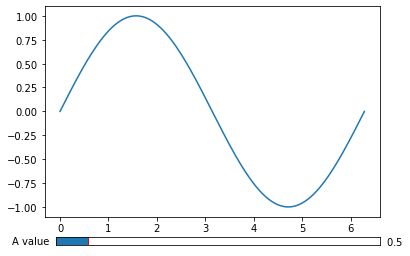

In [106]:
import matplotlib.widgets as mw

fig = plt.figure()

#Setup initial plot of sine function
x = np.linspace(0, 2*np.pi, 200)
l, = plt.plot(x, np.sin(x))
#Adjust figure to make room for slider
plt.subplots_adjust(bottom=0.15)
axslide = plt.axes([0.15, 0.05, 0.75, 0.03]) 
s = mw.Slider(axslide, 'A value', 0., 5.)
#s = widgets.FloatSlider(axslide, 'A value', 0., 5.)

#Define function
def update(A):
    l.set_ydata(np.sin(A*x))
    plt.draw()
#Bind update function to change in slider
s.on_changed(update)
plt.show()

## Summary

  * `NumPy`: defines `nd.array` which is an efficient structure for large arrays, matrices and tensors, and functions to manipulate them
  * `SciPy`: defines a lot of user-friendly routines useful for scientific codes
  * Both rely on efficient low level code, and will generally be much faster than if you try to re-implement them yourself
  * Vectorization !
  * `Matplotlib`: allows you to draw and save plots, from the simplest 2D line plot to complicated 3D plots.
  * Refer to online documentation for a complete list of features: https://docs.scipy.org/doc/